# 双弹簧两端固定


## 问题描述：

两个小球通过弹簧相连，并且另一端通过弹簧固定在墙上。所有弹簧性质都一样。








## 弹簧的势能：

$$V(x)=\frac{1}{2}kx^2+\frac{1}{3}\alpha x^3+ \frac{1}{4} \beta x^4$$

其中 $k$、$\alpha$ 和 $\beta$ 是弹簧的系数，$x$ 是小球相对平衡态位置的偏离。

In [2]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
%matplotlib inline


## 运动方程

设第一个粒子的相对位移和动量为 $x_1$ 和 $p_1$; 第二个粒子的相对位移和动量分别为 $x_2$ 和 $p_2$。则系统总的哈密顿量为：

$$H = \frac{p^2}{2m}+V(x) = \frac{p_1^2}{2m} + \frac{p_2^2}{2m} + V(x_1)+V(x_2-x_1)+V(-x_2)$$

其中，$V(x)=\frac{1}{2}kx^2+\frac{1}{3}\alpha x^3+ \frac{1}{4} \beta x^4$。

则系统的运动方程为：

$$ \left\{
\begin{array}{lll}
\dot x_1  =\frac{\partial H}{\partial p_1}= \frac{p_1}{m} \\
\dot x_2 = \frac{\partial H}{\partial p_2}= \frac{p_2}{m} \\
\dot p_1  = - \frac{\partial H}{\partial x_1}= f(x_1)-f(x_2-x_1) \\
\dot p_2 = - \frac{\partial H}{\partial x_2}=f(x_2-x_1)-f(-x_2)
\end{array}
\right.$$

其中，$f(x) = - \frac{\partial V(x)}{\partial x} = -kx-ax^2-bx^3$。


得到这个一阶方程组后，就可以用`odeint`进行数值积分。

运动方程矢量化后的形式为：$\dot X = F$

其中 $X = \begin{bmatrix}x_1 \\ x_2 \\ p_1 \\p_2\end{bmatrix}$

$F = \begin{bmatrix} \frac{p_1}{m}\\ \frac{p_2}{m}\\ f(x_1)-f(x_2-x_1)\\f(x_2-x_1)-f(-x_2) \end{bmatrix}$

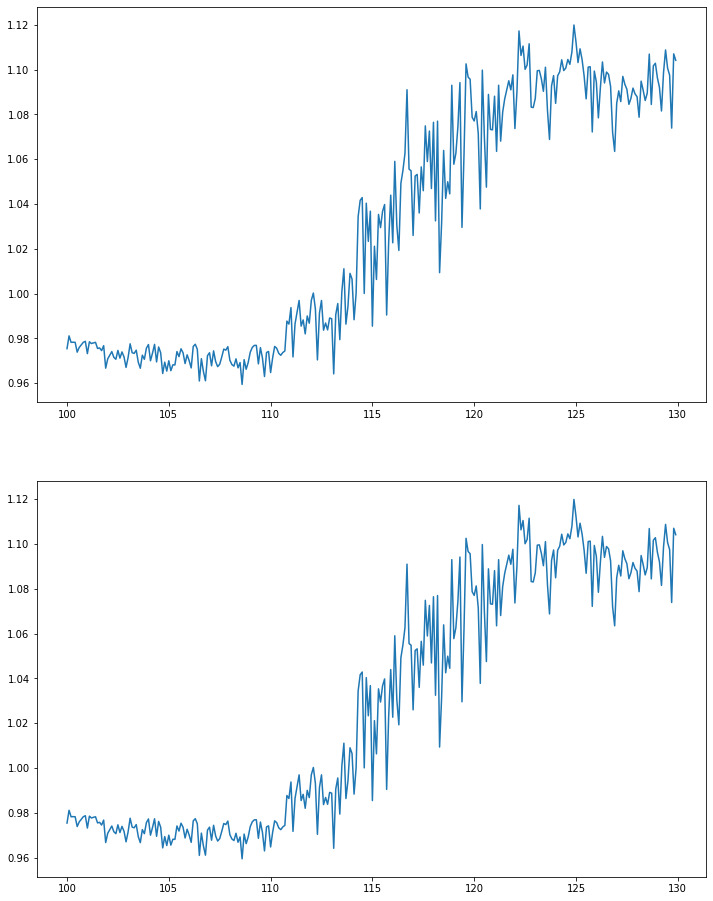

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
%matplotlib inline

def F(x,k,a,b):
    return -k*x-a*x*x-b*x*x*x

def osi(x,t,k,a,b):
    f1=F(x[0],k,a,b)-F(x[1]-x[0],k,a,b)
    f2=F(x[1]-x[0],k,a,b)-F(-x[1],k,a,b)
    return np.array([x[2],x[3],f1,f2])

x0=np.array([0,0,1,-1])
t=np.arange(0,10,0.001)
k=1
a=2
b=3

lxr=[]
lyr=[]
R=[]

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]

for a in np.arange(100,130,0.1):
    xt=odeint(osi,x0,t,args=(k,a,b))
    V1=xt[:,2]
    V2=xt[:,3]
    LX=np.sum(np.log(np.abs(V1)))/10000
    LY=np.sum(np.log(np.abs(V2)))/10000  
    lxr.append(LX)
    lyr.append(LY)
    R.append(a)

fig=plt.figure(figsize=(12,16))
ax1=fig.add_subplot(211)
ax1.plot(R,lxr)
ax2=fig.add_subplot(212)
ax2.plot(R,lyr)


## 利用 `odeint` 数值求解小球的动力学

- 小球$m=1$. 
- 初始条件：给定一固定能量,初始位移取 $0$，根据指定能量给出小球初始动量。即，初始时刻只给系统动能。
- 输出结果：1）位移、动量随时间的演化图；2）相图 $x-p$；3）检验能量随时间是否守恒

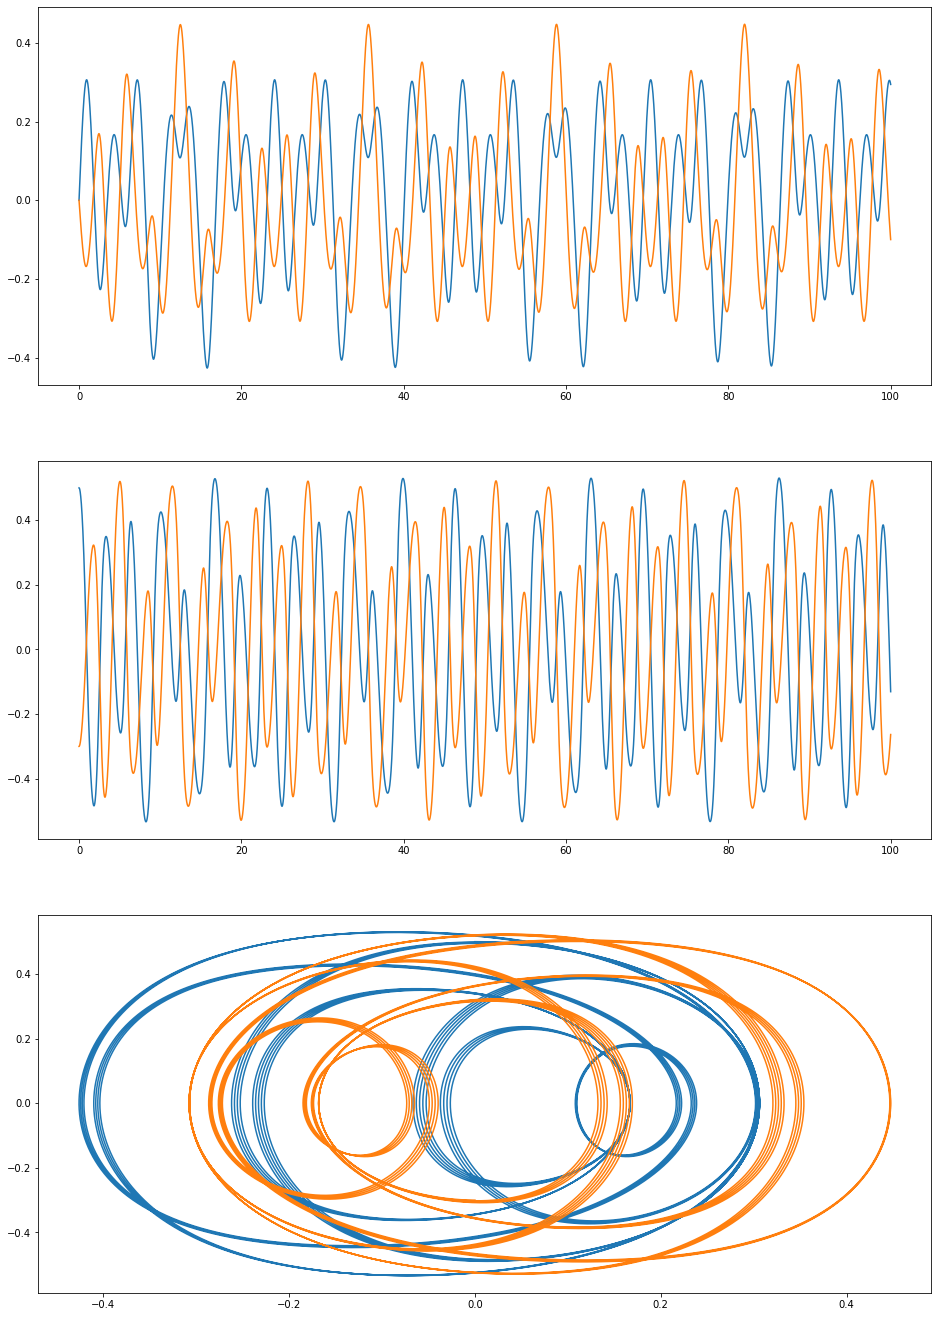

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
%matplotlib inline

def F(x,k,a,b):
    return -k*x-a*x*x-b*x*x*x

def E(x,k,a,b):
    return k*x*x/2+a*np.power(x,3)/3+b*np.power(x,4)/4

def osi(x,t,k,a,b):
    f1=F(x[0],k,a,b)-F(x[1]-x[0],k,a,b)
    f2=F(x[1]-x[0],k,a,b)-F(-x[1],k,a,b)
    return np.array([x[2],x[3],f1,f2])

x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,100,0.001)
k=1
a=2
b=3

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]

fig=plt.figure(figsize=(16,32))
ax1=fig.add_subplot(411)
ax1.plot(t,X1)
ax1.plot(t,X2)
ax2=fig.add_subplot(412)
ax2.plot(t,V1)
ax2.plot(t,V2)
ax3=fig.add_subplot(413)
ax3.plot(X1,V1)
ax3.plot(X2,V2)

# 检验能量是否守恒？

C:\Users\lyckyk\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


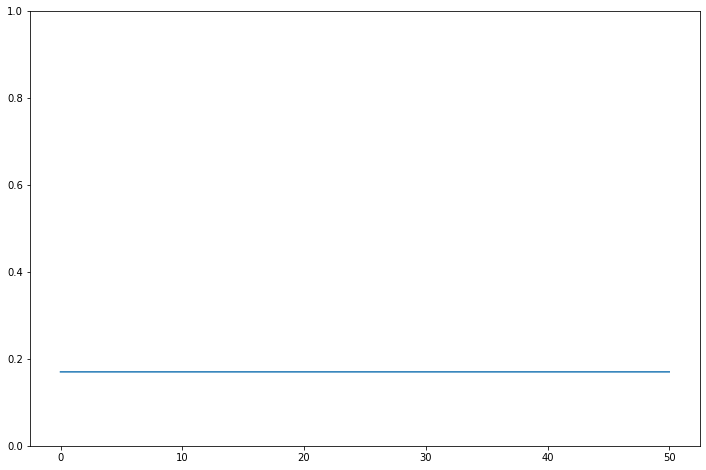

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
%matplotlib inline
x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,50,0.001)
k=1
a=2
b=3

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]
energy=E(X1,k,a,b)+E(-X2,k,a,b)+E(X2-X1,k,a,b)+0.5*(V1*V1+V2*V2)
fig=plt.figure(figsize=(12,8))
plt.ylim(0,1)
ax1=fig.add_subplot(111)
ax1.plot(t,energy)

### 状态演化：$x_1$ vs $t$ ; $x_2$ vs $t$ ; $p_1$ vs $t$ ; $p_2$ vs $t$

# 相图

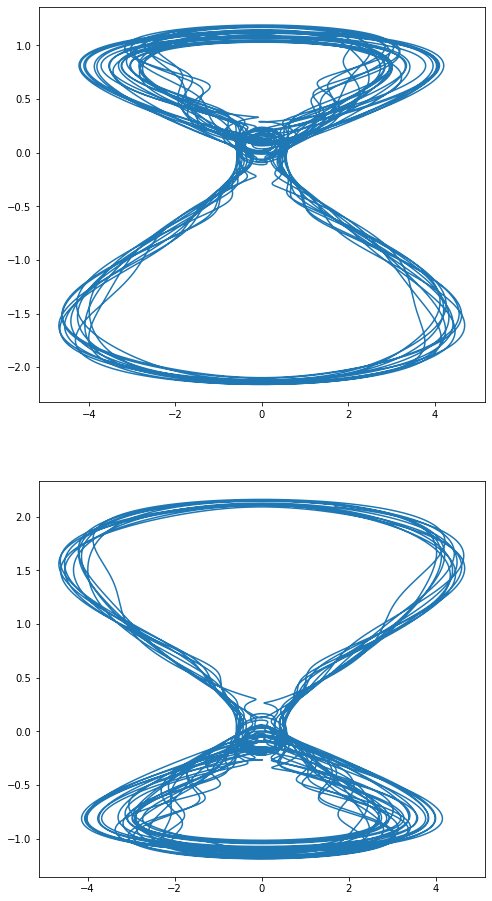

In [43]:
x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,100,0.001)
k=1
a=50
b=20

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]
fig=plt.figure(figsize=(8,16))
ax1=fig.add_subplot(211)
ax1.plot(V1,X1)
ax2=fig.add_subplot(212)
ax2.plot(V2,X2)

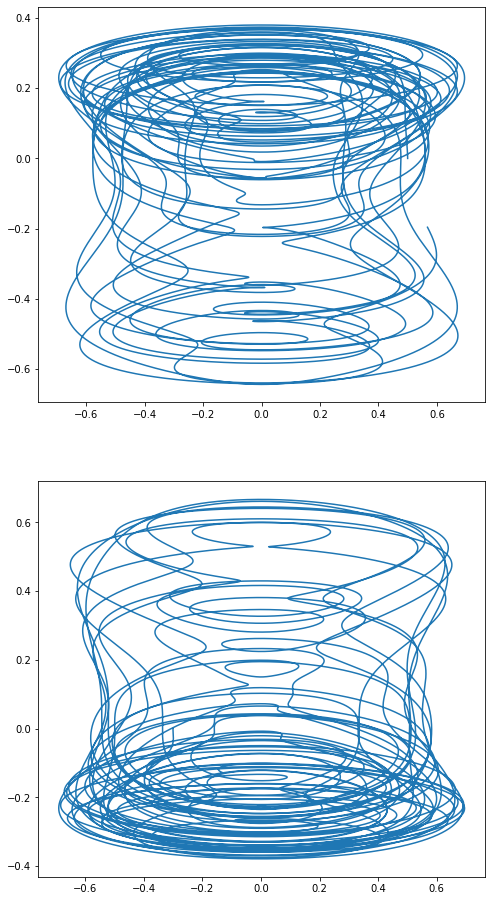

In [44]:
x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,100,0.001)
k=1
a=25
b=30

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]
fig=plt.figure(figsize=(8,16))
ax1=fig.add_subplot(211)
ax1.plot(V1,X1)
ax2=fig.add_subplot(212)
ax2.plot(V2,X2)

# 庞加莱截面

双振子系统的相空间是四维的。由于能量守恒，相空间被约束在一个三维超曲面上。我们用庞加莱截面来展示其运动规律。

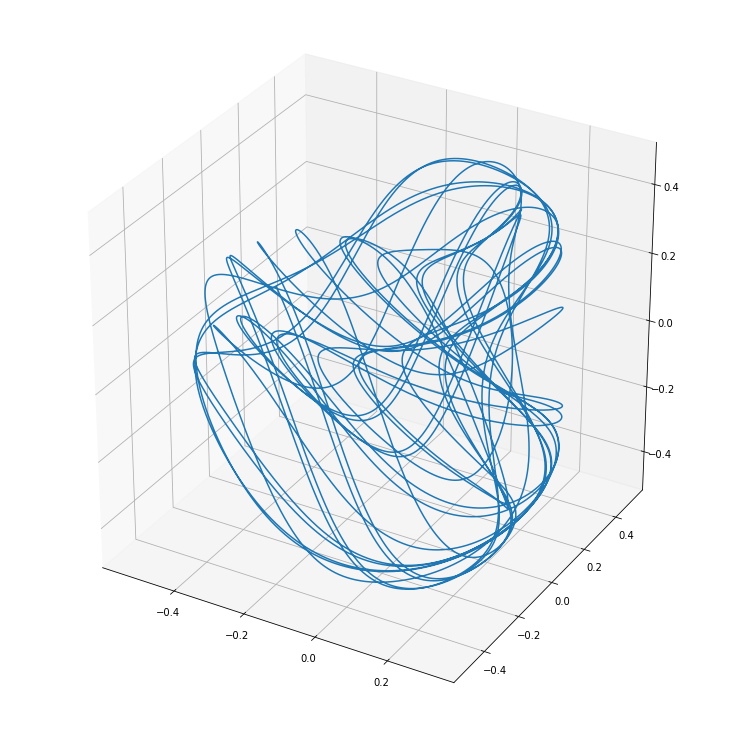

In [45]:
x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,100,0.001)
k=1
a=5
b=6

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot(X1,V1,V2)
plt.show()

### 非线性振子：$k=1$ & $\alpha = 0$ & 变化 $\beta$

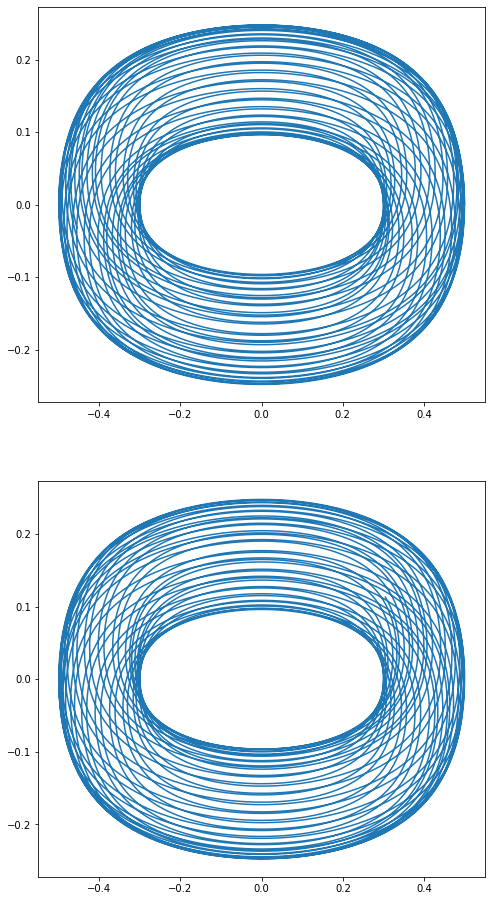

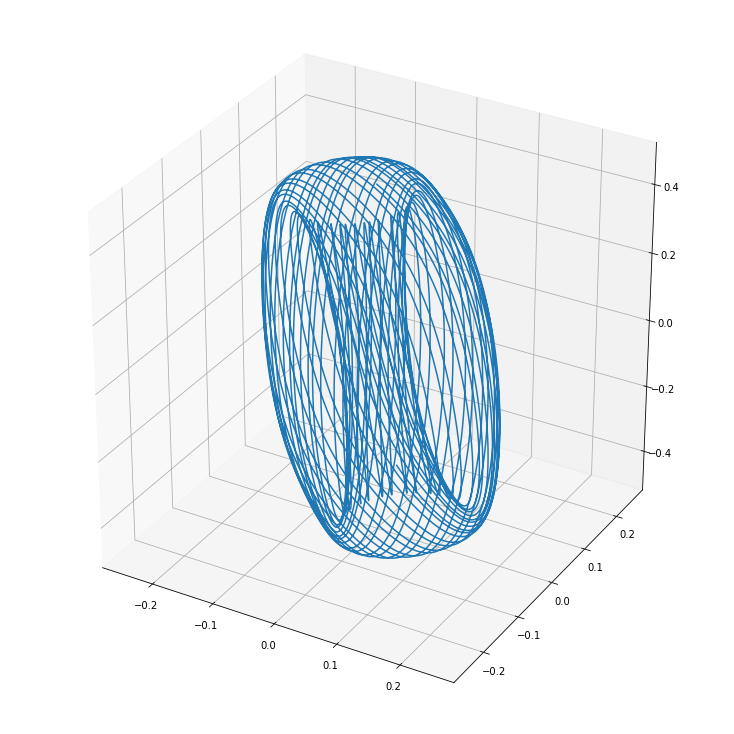

In [46]:
x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,100,0.001)
k=1
a=0
b=17

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]
fig=plt.figure(figsize=(8,16))
ax1=fig.add_subplot(211)
ax1.plot(V1,X1)
ax2=fig.add_subplot(212)
ax2.plot(V2,X2)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot(X1,X2,V1)
plt.show()

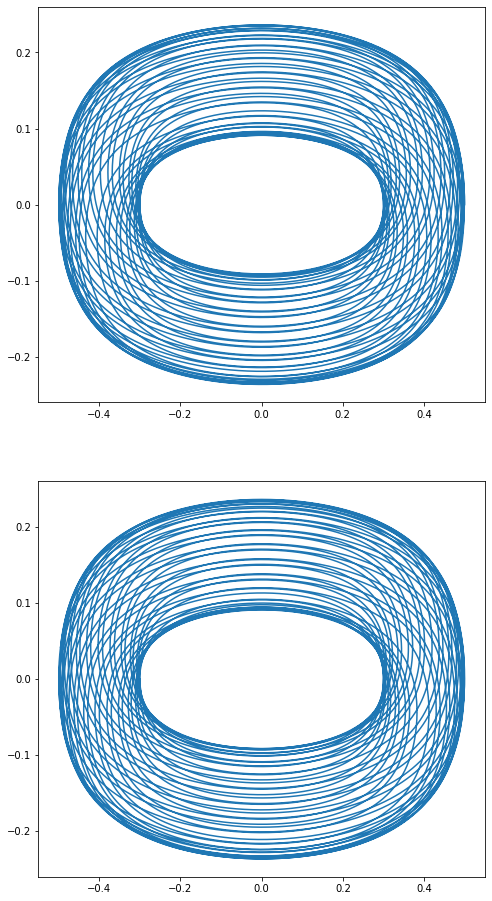

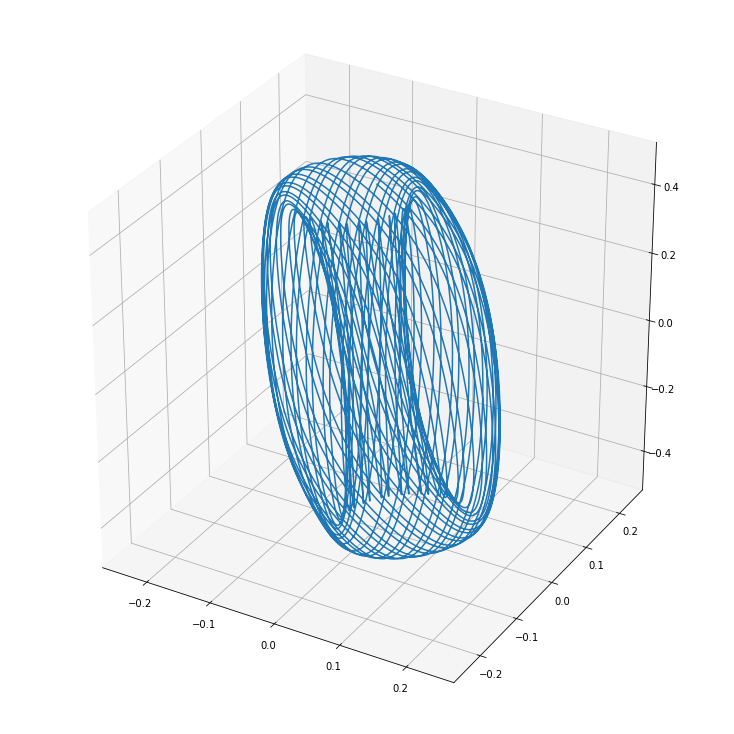

In [47]:
x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,100,0.001)
k=1
a=0
b=23

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]
fig=plt.figure(figsize=(8,16))
ax1=fig.add_subplot(211)
ax1.plot(V1,X1)
ax2=fig.add_subplot(212)
ax2.plot(V2,X2)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot(X1,X2,V1)
plt.show()

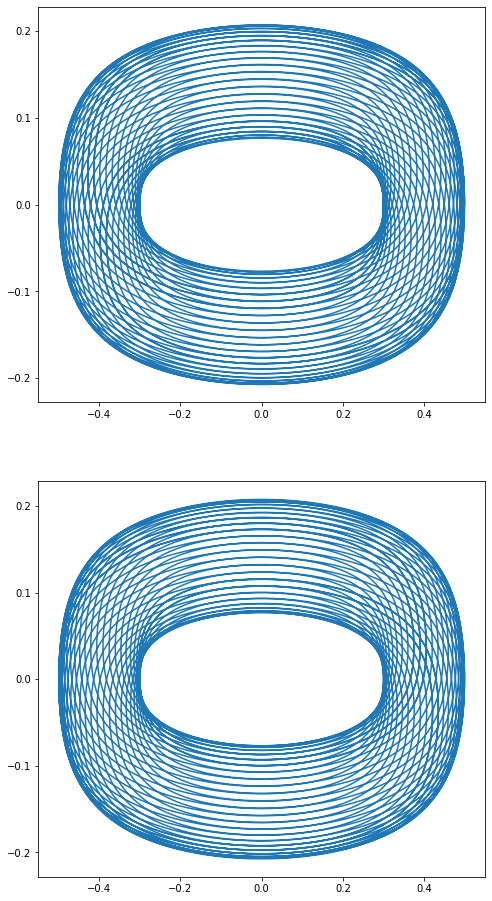

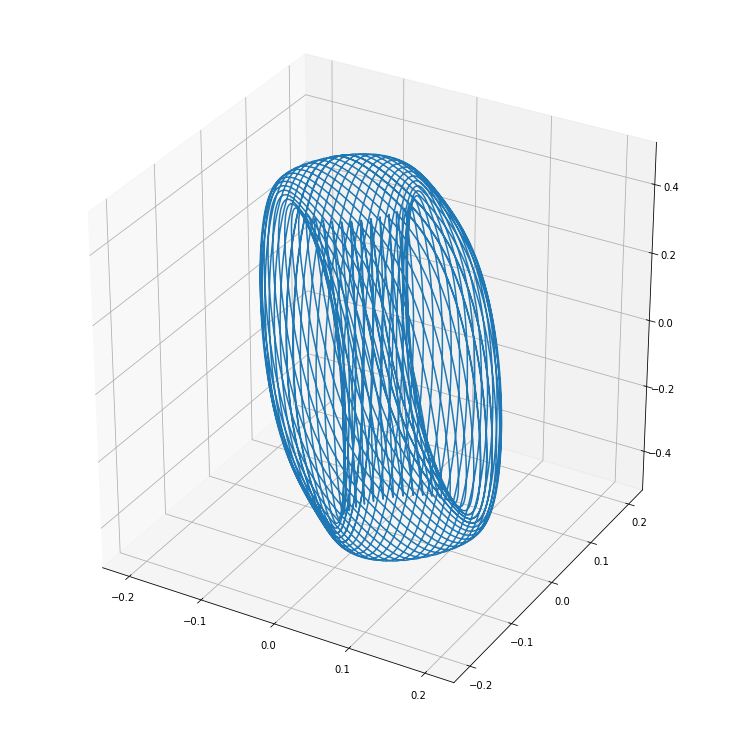

In [48]:
x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,100,0.001)
k=1
a=0
b=50

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]
fig=plt.figure(figsize=(8,16))
ax1=fig.add_subplot(211)
ax1.plot(V1,X1)
ax2=fig.add_subplot(212)
ax2.plot(V2,X2)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot(X1,X2,V1)
plt.show()

### 非线性振子：$k=1$ & $\beta = 1$ 变化 $\alpha$

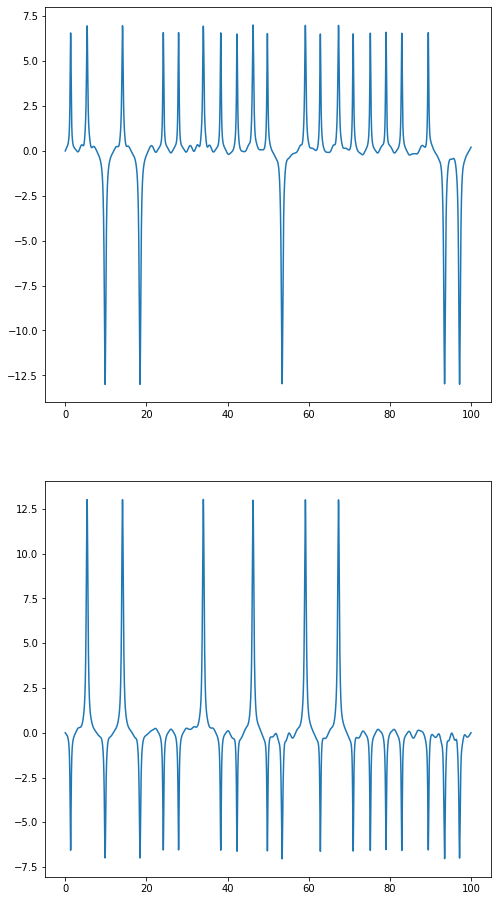

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
%matplotlib inline

def F(x,k,a,b):
    return -k*x-a*x*x-b*x*x*x

def E(x,k,a,b):
    return k*x*x/2+a*np.power(x,3)/3+b*np.power(x,4)/4

def osi(x,t,k,a,b):
    f1=F(x[0],k,a,b)-F(x[1]-x[0],k,a,b)
    f2=F(x[1]-x[0],k,a,b)-F(-x[1],k,a,b)
    return np.array([x[2],x[3],f1,f2])

x0=np.array([0,0,0.5,-0.3])
t=np.arange(0,100,0.001)
k=1
a=15
b=1

xt=odeint(osi,x0,t,args=(k,a,b))

X1=xt[:,0]
X2=xt[:,1]
V1=xt[:,2]
V2=xt[:,3]
fig=plt.figure(figsize=(8,16))
ax1=fig.add_subplot(211)
ax1.plot(t,X1)
ax2=fig.add_subplot(212)
ax2.plot(t,X2)

## 第四次作业 非线性双振子

- 分对称非线性($\alpha = 0$)和非对称非线性($\alpha \not = 0$ )讨论。

- 函数图，相图，时间演化图

- 利用庞加莱截面以及最大李雅普诺夫指数探索其混沌性质，对比对称非线性和不对称非线性的不同。




1.非对称非线性项更容易使体系趋于混乱的状态，对称非线性项的影响下，体系相对更有规律。

# 计算李雅普诺夫指数

# α变化

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
%matplotlib inline


x0=np.array([0,0,1,-1])
t=np.arange(0,10,0.001)
k=1
a=0.8
b=1

lxr=[]
lyr=[]
R=[]

for a in np.arange(0,150,0.1):
    xt=odeint(osi,x0,t,args=(k,a,b))
    V1=xt[:,2]
    V2=xt[:,3]
    LX=np.sum(np.log(np.abs(V1)))/10000
    LY=np.sum(np.log(np.abs(V2)))/10000  
    lxr.append(LX)
    lyr.append(LY)
    R.append(a)

fig=plt.figure(figsize=(12,16))
ax1=fig.add_subplot(211)
ax1.plot(R,lxr)
ax2=fig.add_subplot(212)
ax2.plot(R,lyr)

# β变化

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
%matplotlib inline


x0=np.array([0,0,1,-1])
t=np.arange(0,10,0.001)
k=1
a=3
b=3

lxr=[]
lyr=[]
R=[]

for b in np.arange(0,100,0.1):
    xt=odeint(osi,x0,t,args=(k,a,b))
    V1=xt[:,2]
    V2=xt[:,3]
    LX=np.sum(np.log(np.abs(V1)))/10000
    LY=np.sum(np.log(np.abs(V2)))/10000  
    lxr.append(LX)
    lyr.append(LY)
    R.append(b)

fig=plt.figure(figsize=(12,16))
ax1=fig.add_subplot(211)
ax1.plot(R,lxr)
ax2=fig.add_subplot(212)
ax2.plot(R,lyr)